<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du Cours TAL est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais.

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Rappels de Python: pour utiliser NLTK en Python, notamment dans un _notebook_ Jupyter, vous devez exécuter `import nltk`, ce qui vous permet d'accéder à toutes les commandes avec le préfixe `nltk`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements (faire `import nltk` puis `nltk.download()`).  Cela vous permettra de télécharger de nombreux corpus additionnels, mais que nous n'utiliserons pas dans ce laboratoire.

In [77]:
import nltk
#nltk.download()
import os
#from nltk.book import *

**1a.** Écrivez une liste de mots (strings) que vous appelerez `sentence1`, formant une phrase en anglais.

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, triez les bi-grammes par ordre alphabétique et affichez le résultat.

In [78]:
from nltk import *

# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
sentence1 = ['Je', 'mange', 'des', 'pommes', 'de', 'terre']
print('Longueur :', len(sentence1))

bigrams = list(nltk.bigrams(sentence1))
print('Bigrammes :', bigrams)
sorted_bigrams = [sorted(b) for b in bigrams]
print(sorted_bigrams)


Longueur : 6
Bigrammes : [('Je', 'mange'), ('mange', 'des'), ('des', 'pommes'), ('pommes', 'de'), ('de', 'terre')]
[['Je', 'mange'], ['des', 'mange'], ['des', 'pommes'], ['de', 'pommes'], ['de', 'terre']]


**1b.** Définissez maintenant une chaîne unique appelée `string2` contenant une phrase, incluant par exemple des ponctuations.  

Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [79]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
string2 = "Waow ! J'adore le langage Python :)"

sentence2 = nltk.word_tokenize(string2)
print(sentence2)


['Waow', '!', "J'adore", 'le', 'langage', 'Python', ':', ')']


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

**2a.** Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stockez son contenu dans une chaîne et affichez sa longueur.

In [80]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

print('Longueur :', len(raw))


Longueur : 1135214


**2b.** En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder uniquement le texte principal du roman.  Vous pouvez utiliser la notation dite de *slicing* en Python, et essayer de localiser des chaînes qui indiquent où commence et finit le véritable texte. Quelle est la longueur de ce texte en caractères ?  

Si vous avez des problèmes avec les retours à la ligne, pensez à les remplacer avec la fonction `.replace(..., ...)`.  Si vous avez des problèmes d'encodage, voir le [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).

In [81]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
idx_start = raw.find('PART I')
idx_end = raw.find('EPILOGUE')

main_part = raw[idx_start:idx_end]

**2c.** Veuillez maintenant segmenter le texte en phrases avec NLTK, et afficher le nombre de phrases obtenues, ainsi qu'un court extrait de 4 phrases. 

Puis veuillez écrire les phrases dans un nouveau fichier, avec une phrase par ligne.

Comment appréciez-vous la qualité de la segmentation ?  Veuillez écrire votre appréciation dans une nouvelle cellule ci-dessous.

**Indications :**
* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`
* vous aurez besoin de la fonction de nltk (vue en cours) appelée `nltk.sent_tokenize(...)` qui est documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize) (rappel : le nom "sentence tokenize" n'est pas très logique).

In [82]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
main_part = main_part.replace('\n', ' ')

sentences = nltk.sent_tokenize(main_part)

print('Nb de phrases trouvées :', len(sentences))
print(sentences[:4])


Nb de phrases trouvées : 11584
['PART I    CHAPTER I  On an exceptionally hot evening early in July a young man came out of the garret in which he lodged in S. Place and walked slowly, as though in hesitation, towards K. bridge.', 'He had successfully avoided meeting his landlady on the staircase.', 'His garret was under the roof of a high, five-storied house and was more like a cupboard than a room.', 'The landlady who provided him with garret, dinners, and attendance, lived on the floor below, and every time he went out he was obliged to pass her kitchen, the door of which invariably stood open.']


In [83]:
filename1 = "main_part.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)
fd = open(filename1, 'a', encoding='utf8')
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

for sentence in sentences:
    fd.write(sentence + '\n')


*Appréciation de la qualité :*

Dans l'ensemble, la segmentation est de bonne qualité mais il y a quelques problèmes :

"  Yes, maybe it is a plaything.”  The heat in the street was terri  "

Dans l'exemple ci-dessus, la séparation ne s'est pas faite car le point était suivi de guillemets. 

Le tokenizer ne sait pas non plus quoi faire avec les titres de chapitres :
"  PART I    CHAPTER I  On an exception [...]  "


**2d.** Veuillez maintenant segmenter chaque phrase du (2c) en tokens (mots et ponctuations).  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez le nombre total de _tokens_. Puis, affichez 4 phrases et commentez la qualité de la tokenisation.  Veuillez également créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  

Vous aurez besoin de la fonction de nltk (vue en cours) appelée `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize)).

In [84]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

sentences_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]

total = sum([len(tokens) for tokens in sentences_tokens])

print('Nb total de tokens :', total)

print(sentences_tokens[:4])


Nb total de tokens : 245593
[['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.'], ['He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase', '.'], ['His', 'garret', 'was', 'under', 'the', 'roof', 'of', 'a', 'high', ',', 'five-storied', 'house', 'and', 'was', 'more', 'like', 'a', 'cupboard', 'than', 'a', 'room', '.'], ['The', 'landlady', 'who', 'provided', 'him', 'with', 'garret', ',', 'dinners', ',', 'and', 'attendance', ',', 'lived', 'on', 'the', 'floor', 'below', ',', 'and', 'every', 'time', 'he', 'went', 'out', 'he', 'was', 'obliged', 'to', 'pass', 'her', 'kitchen', ',', 'the', 'door', 'of', 'which', 'invariably', 'stood', 'open', '.']]


In [86]:
filename2 = "tokens.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt
if os.path.exists(filename2): 
    os.remove(filename2)
fd = open(filename2, 'a', encoding='utf8')

for tokens in sentences_tokens:
    for token in tokens:
        fd.write(token + ' ')
    fd.write('\n')

*Appréciation de la qualité :*

C'est une bonne tokenisation. Le résultat est quasiment identique au fichier précédent mais il y a des espaces en plus avant chaque ponctuation.

**2e.** Veuillez maintenant tokeniser un texte sans le segmenter préalablement en phrases, en effectuant la tokenisation directement sur la chaîne de caractères contenant tout le texte.  Veuillez afficher un court extrait de 50 tokens. 

Veuillez afficher le nombre total de tokens : est-ce qu'il est identique au total obtenu au (2d) ?  

Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [103]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
tokens = nltk.word_tokenize(main_part)
print('Nb tokens :', len(tokens))
print(tokens[:50])


Nb tokens : 245593
['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.', 'He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase']


*Réponse :* 
Oui, c'est exactement le même nombre de tokens.

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  

Les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`.

Les objets `nltk.Text` peuvent en principe être créés avec : 
1. la chaîne de caractères constituant le texte (string)
2. la liste de tous les mots du texte (tableau de string)
3. la liste de toutes les phrases (tableau de listes de string)

**Seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`.**


**3a.** Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  Vous pouvez appeler ici de nouveau la fonction `nltk.word_tokenize` ou réutiliser le résultat du (2e).  Il n'y a rien à afficher ici.

In [104]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text = nltk.Text(tokens=tokens)


**3b.** Veuillez afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`.  Cette méthode est décrite au
 [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) qui montre aussi d'autres exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.

In [118]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text.concordance('tremor')

Displaying 7 of 7 matches:
 With a sinking heart and a nervous tremor , he went up to a huge house which 
noticed , thank God ! ” Then with a tremor he broke the seal of the notice and
 ? ” Raskolnikov asked himself in a tremor . “ Why did I say that about women 
Sonia ’ s face suddenly changed ; a tremor passed over it . She looked at him 
hat he said and feeling a continual tremor all over . “ Oh , how you are suffe
pugnance , no trace of disgust , no tremor in her hand . It was the furthest l
, I held my breath and was all in a tremor . ‘ Here is my little fact , ’ thou


**3c.** Veuillez trouver les 10 mots qui ont les contextes les plus semblables à un mot de votre choix, en utilisant la méthode `similar`.  Cette méthode est aussi décrite au [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html).  Est-ce que les mots ayant des contextes semblables sont aussi semblables par le sens au mot choisi ?

In [121]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text.similar('good', num=10)


strange bad little man his time right hand soul great


*Réponse :*

Non, c'est parfois même l'inverse. Le mot "good" a un contexte semblable "bad". 

**3d.** En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations (couples de mots) les plus fréquentes dans votre texte.

In [125]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text.collocation_list(num=10)


[('Katerina', 'Ivanovna'),
 ('Pyotr', 'Petrovitch'),
 ('Pulcheria', 'Alexandrovna'),
 ('Avdotya', 'Romanovna'),
 ('Rodion', 'Romanovitch'),
 ('Marfa', 'Petrovna'),
 ('Sofya', 'Semyonovna'),
 ('old', 'woman'),
 ('Porfiry', 'Petrovitch'),
 ('Amalia', 'Ivanovna')]

**3e.** On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste de ses _types_) simplement en convertissant la liste des _tokens_ déjà obtenue dans une variable de type `set` en Python.  
* Veuillez obtenir ainsi le vocabulaire de votre texte.
* Combien de mots différents y a-t-il dans le vocabulaire, en incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [133]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
types = set(tokens)
print('Nb de types :', len(types))
print(sorted(types, key=len, reverse=True)[:20])

Nb de types : 10813
['grey-and-rainbow-coloured', 'frightened-looking', 'disproportionately', 'Schleswig-Holstein', '_psychologically_', 'well-proportioned', 'Cough-cough-cough', 'cross-examination', 'indistinguishable', 'Governor-General', 'horrible-looking', 'pawnbroker-woman', 'misunderstanding', 'self-confidently', 'poverty-stricken', 'straight-forward', 'indiscriminately', 'delicate-looking', '_Hof-kriegsrath_', 'sinister-looking']


*Réponse :*

Les "mots" les plus longs sont souvent des mots composés contenant des tirets '-'

**3f.** Veuillez construire la distribution de fréquences de votre texte, en utilisant un objet `FreqDist`, et utilisez-là pour afficher les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

Indication : NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text` en les stockant dans un objet de type `FreqDist` (pour _frequency distribution_) comme expliqué dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de cet objet, on peut déterminer les mots les plus fréquents.

<Axes: xlabel='Samples', ylabel='Counts'>

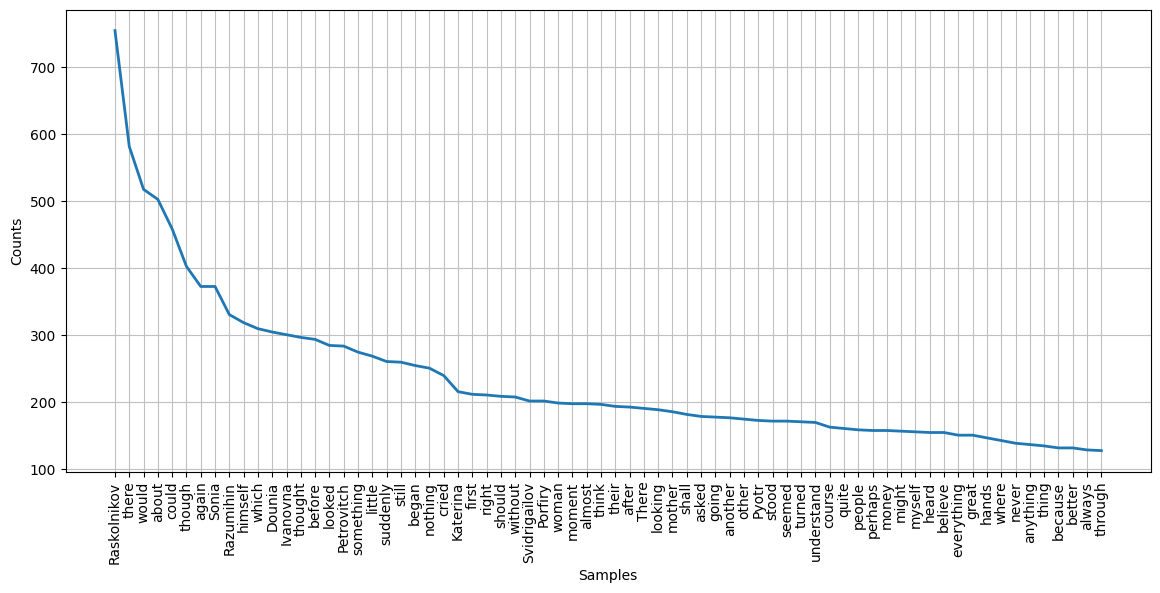

In [146]:
from matplotlib.pyplot import figure
from nltk import FreqDist
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

tokens_with_more_than_4_letters = [tok for tok in tokens if len(tok) > 4]
new_text = nltk.Text(tokens=tokens_with_more_than_4_letters)

fdist1 = FreqDist(new_text)

figure(figsize=(14, 6), dpi=100)
fdist1.plot(70, cumulative=False)

## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

In [97]:
import matplotlib.pyplot
%matplotlib inline

**4a.** Veuillez afficher le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

In [98]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.


**4b.** Veuillez construir une liste avec la longueur de chaque _token_ du texte.  La liste aura donc autant de nombres que de tokens.  Veuillez créer un nouvel objet `FreqDist` à partir de cette liste de nombres, et affichez la distribution _non-cumulative_ des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

In [99]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.


In [100]:
# Vos réponses aux deux questions ici :

**4c.** Veuillez générer la liste des fréquences des mots de votre texte par ordre décroissant (sans les mots, seulement les valeurs des fréquences).  Limitez cette liste à *N* valeurs (par exemple *N* = 100).  Affichez avec `matplotlib.pyplot.plot` la courbe en fonction du rang, c'est-à-dire le rang (1, 2, 3, ..., **) sur l'axe *x* et la fréquence sur l'axe *y*.

Note : on génère directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

Ajoutez une deuxième courbe (dans la même commande `plot`) selon la formule *y* = *a* / (*x* + *b*) en choississant par essais successifs des valeurs de *a* et *b* qui vous rapprochent autant que possible de la courbe des fréquences.  Cette formule est appelée *Loi de Zipf* et illustre une propriété du vocabulaire d'un échantillon suffisamment grand de texte.

In [101]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.


## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ en ajoutant vos deux noms.  Puis ajoutez-le dans une archive _zip_ avec le _notebook_ de la partie 1c, et soumettez l'archive sur Cyberlearn. 